In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import atus_analysis as at
%matplotlib inline

In [2]:
activity, respondent, roster = at.read_in_data()

In [3]:
child_care = activity[['TUCASEID', 'TUACTIVITY_N', 'TUACTDUR24']].copy()

In [4]:
# for ID, household in child_care_by_ID:
#     print(ID)
#     print(household)
#child_care['codes'] = at.get_six_digit_codes(child_care)
child_care['codes'] = [str(row.TUTIER1CODE) + str(row.TUTIER2CODE) + str(row.TUTIER3CODE) for row in activity.itertuples()] 

In [5]:
child_care_by_ID = child_care.groupby(['TUCASEID'])

In [6]:
child_care_by_ID.get_group(20140101140007)

,TUCASEID,TUACTIVITY_N,TUACTDUR24,codes
0,20140101140007,1,540,111
1,20140101140007,2,30,311
2,20140101140007,3,60,121
3,20140101140007,4,10,18111
4,20140101140007,5,30,1111
5,20140101140007,6,20,18131
6,20140101140007,7,90,13116
7,20140101140007,8,25,18131
8,20140101140007,9,30,1233
9,20140101140007,10,605,111


In [7]:
child_care_codes = ['31', '32', '33']
child_care_time = pd.Series(at.get_minutes_subject(child_care_by_ID, child_care_codes), name='Child Care Time')

In [8]:
child_care_time = pd.DataFrame(child_care_time)

In [9]:
#child_care_time = child_care_time.rename(columns={'0': 'Child Care Time'})

In [10]:
weight = respondent[['TUCASEID', 'TUFINLWGT', 'TRCHILDNUM', 'TRERNWA']].copy()

In [11]:
weight.set_index(weight.pop('TUCASEID'), inplace=True)

In [12]:
#child_care_time['TUCASEID'] = child_care_time.index.to_series()

In [13]:
weighted_child_care = weight.join(child_care_time)

In [14]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 20140101140007 to 20141212142500
Data columns (total 3 columns):
TUFINLWGT     11592 non-null float64
TRCHILDNUM    11592 non-null int64
TRERNWA       11592 non-null int64
dtypes: float64(1), int64(2)
memory usage: 362.2 KB


In [15]:
weighted_child_care['TRERNWA'] = weighted_child_care['TRERNWA'].replace(-1, 0)
weighted_child_care['TRERNWA'] = weighted_child_care['TRERNWA'] / 100

In [16]:
roster.head()

,TUCASEID,TULINENO,TEAGE,TERRP,TESEX,TXAGE,TXRRP,TXSEX
0,20140101140007,1,20,19,2,0,0,0
1,20140101140007,2,19,21,1,0,0,0
2,20140101140007,3,0,22,1,0,0,0
3,20140101140011,1,16,18,2,0,0,0
4,20140101140011,2,33,24,2,0,0,0


In [17]:
weighted_child_care['weighted_care_time'] = weighted_child_care['TUFINLWGT'] * weighted_child_care['Child Care Time']

In [18]:
weighted_child_care.head()

,TUFINLWGT,TRCHILDNUM,TRERNWA,Child Care Time,weighted_care_time
TUCASEID,,,,,
20140101140007,4.891316e+06,1,0.00,30.0,1.467395e+08
20140101140011,2.314737e+07,1,1846.15,NaN,NaN
20140101140028,2.094182e+07,3,0.00,180.0,3.769528e+09
20140101140063,2.505899e+06,0,0.00,NaN,NaN
20140101140168,1.592823e+07,1,0.00,175.0,2.787441e+09


In [19]:
summed_child_care = weighted_child_care.sum()

In [20]:
summed_child_care

TUFINLWGT             9.201173e+10
TRCHILDNUM            9.154000e+03
TRERNWA               5.884625e+06
Child Care Time       3.504950e+05
weighted_care_time    2.267731e+12
dtype: float64

In [21]:
child_care_avg_daily_minutes = summed_child_care['weighted_care_time'] / summed_child_care['TUFINLWGT']

In [22]:
child_care_avg_daily_minutes

24.646112399316848

In hours:

In [23]:
child_care_hourly = child_care_avg_daily_minutes / 60

In [24]:
child_care_hourly

0.41076853998861412

0.41 corresponds to the figure reported by the BLS in their table 1 from their [press release](http://www.bls.gov/news.release/archives/atus_06242015.htm) of the 2014 Survey.
![Hourly Child Care in the US](img/ATUS-Survey-hourly-childcare.png)

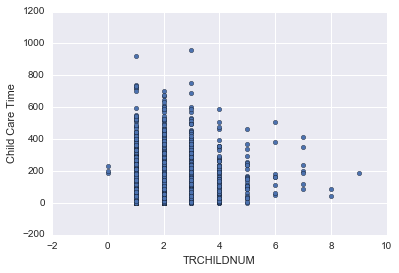

In [25]:
weighted_child_care.plot(kind='scatter', x='TRCHILDNUM', y='Child Care Time')

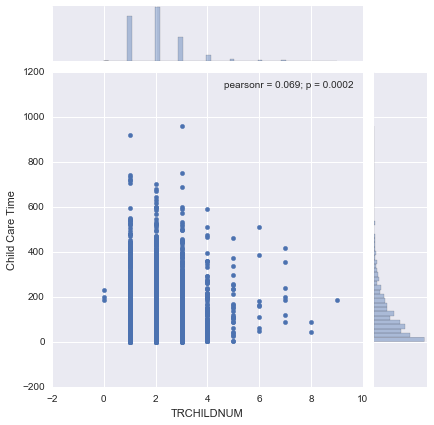

In [26]:
sns.jointplot(x="TRCHILDNUM", y='Child Care Time', data=weighted_child_care)

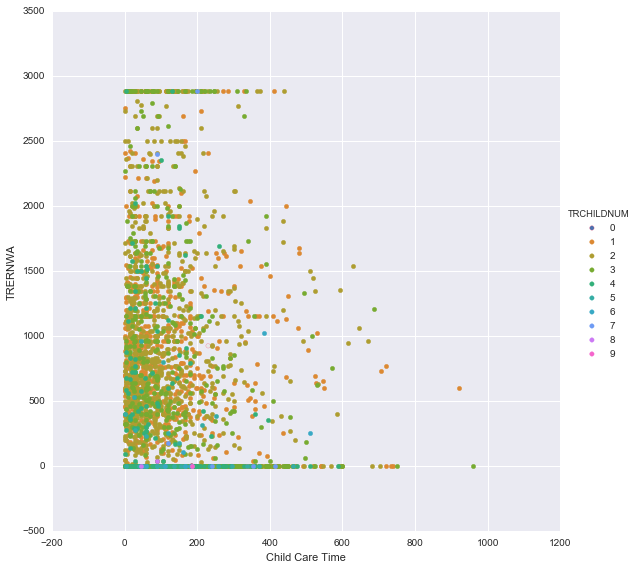

In [27]:
sns.FacetGrid(weighted_child_care, hue="TRCHILDNUM", size=8) \
   .map(plt.scatter, "Child Care Time", "TRERNWA") \
   .add_legend()

In [28]:
weighted_child_care.corr()

,TUFINLWGT,TRCHILDNUM,TRERNWA,Child Care Time,weighted_care_time
TUFINLWGT,1.000000,-0.039614,-0.038998,-0.050574,0.466304
TRCHILDNUM,-0.039614,1.000000,0.111805,0.069178,0.090066
TRERNWA,-0.038998,0.111805,1.000000,-0.099774,-0.162361
Child Care Time,-0.050574,0.069178,-0.099774,1.000000,0.686949
weighted_care_time,0.466304,0.090066,-0.162361,0.686949,1.000000


In [29]:
sleep = activity[['TUCASEID', 'TUACTIVITY_N', 'TUACTDUR24']].copy()
sleep['codes'] = [str(row.TUTIER1CODE) + str(row.TUTIER2CODE) + str(row.TUTIER3CODE) for row in activity.itertuples()]
sleep_by_ID = sleep.groupby(['TUCASEID'])

sleep_codes = ['111', '113']
sleeping_time = pd.Series(at.get_minutes_subject(sleep_by_ID, sleep_codes), name='Minutes Sleeping')
sleep_weight = respondent[['TUCASEID', 'TUFINLWGT', 'TRCHILDNUM', 'TRERNWA']].copy()
age_sex = pd.DataFrame.from_records([(row.TUCASEID, row.TEAGE, row.TESEX) for row in roster.itertuples() if row.TULINENO == 1], columns=['TUCASEID', 'Age', 'Sex'])

In [30]:
sleeping_time.name

'Minutes Sleeping'

In [31]:
sleep_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11592 entries, 0 to 11591
Data columns (total 4 columns):
TUCASEID      11592 non-null int64
TUFINLWGT     11592 non-null float64
TRCHILDNUM    11592 non-null int64
TRERNWA       11592 non-null int64
dtypes: float64(1), int64(3)
memory usage: 362.3 KB


In [32]:
age_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11592 entries, 0 to 11591
Data columns (total 3 columns):
TUCASEID    11592 non-null int64
Age         11592 non-null int64
Sex         11592 non-null int64
dtypes: int64(3)
memory usage: 271.8 KB


In [33]:
sleep_weight.set_index(sleep_weight.pop('TUCASEID'), inplace=True)
age_sex.set_index(age_sex.pop('TUCASEID'), inplace=True)
weighted_sleep = sleep_weight.join([age_sex, sleeping_time])

In [34]:
weighted_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 20140101140007 to 20141212142500
Data columns (total 6 columns):
TUFINLWGT           11592 non-null float64
TRCHILDNUM          11592 non-null int64
TRERNWA             11592 non-null int64
Age                 11592 non-null int64
Sex                 11592 non-null int64
Minutes Sleeping    11589 non-null float64
dtypes: float64(2), int64(4)
memory usage: 633.9 KB


In [35]:
weighted_sleep['Weighted Minutes Sleeping'] = weighted_sleep['TUFINLWGT'] * weighted_sleep['Minutes Sleeping']

In [36]:
weighted_sleep['TRERNWA'] = weighted_sleep['TRERNWA'].replace(-1, 0)
weighted_sleep['TRERNWA'] = weighted_sleep['TRERNWA'] / 100

In [37]:
weighted_sleep.head()

,TUFINLWGT,TRCHILDNUM,TRERNWA,Age,Sex,Minutes Sleeping,Weighted Minutes Sleeping
TUCASEID,,,,,,,
20140101140007,4.891316e+06,1,0.00,20,2,1175.0,5.747296e+09
20140101140011,2.314737e+07,1,1846.15,16,2,585.0,1.354121e+10
20140101140028,2.094182e+07,3,0.00,65,2,615.0,1.287922e+10
20140101140063,2.505899e+06,0,0.00,50,2,780.0,1.954602e+09
20140101140168,1.592823e+07,1,0.00,23,2,710.0,1.130904e+10


In [38]:
summed_sleep = weighted_sleep.sum()
average_sleep_minutes = summed_sleep['Weighted Minutes Sleeping'] / summed_sleep['TUFINLWGT']
average_sleep_hour = average_sleep_minutes / 60
average_sleep_hour

9.8104467788552601

Sadly, this calculation is off the mark. BLS puts hours of sleep per day at 8.80.
![Average hours of sleep](img/ATUS-Survey-hourly-sleep.png)

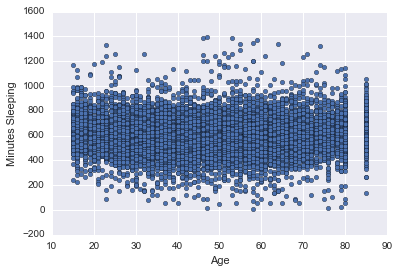

In [39]:
weighted_sleep.plot(kind='scatter', x='Age', y='Minutes Sleeping')

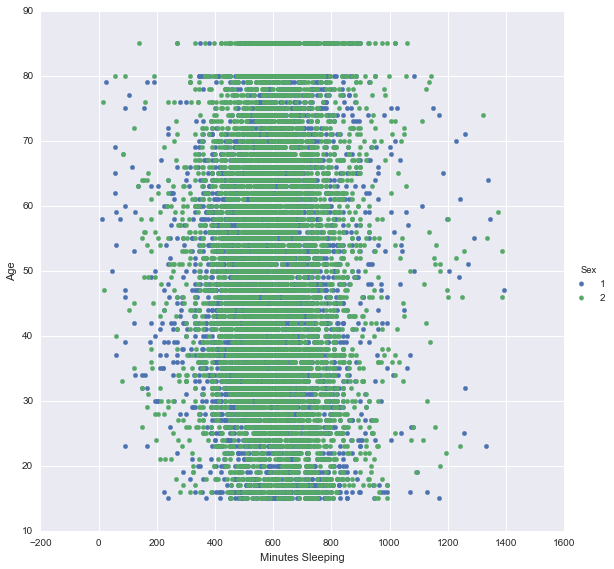

In [40]:
sns.FacetGrid(weighted_sleep, hue="Sex", size=8) \
   .map(plt.scatter, "Minutes Sleeping", "Age") \
   .add_legend()